# EJERCICIOS

In [142]:
import numpy as np
import joblib
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.datasets import load_diabetes, load_iris
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict,RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression,SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, root_mean_squared_error,mean_squared_error,ConfusionMatrixDisplay,roc_auc_score
from sklearn.preprocessing import StandardScaler,FunctionTransformer,OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.exceptions import ConvergenceWarning
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from scipy.stats import uniform




In [44]:
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

## EJERCICIO 1

Imagina que estás usando regresión polinomial. Trazas las curvas de aprendizaje y te das cuenta de que hay un espacio grande entre el error de entrenamiento y el error de validación. ¿Qué está pasando? Piensa en tres formas de poder arreglarlo

In [4]:
# Seguramente el modelo haya cogido un polinomio de grado demasiado alto para ajustar la curva lo mejor posible a los datos
# de entrenamiento, es decir está sobreajustado a los datos de entrenamiento y no generaliza bien, tambien puede deberse a 
# un volumen de datos más pequeño del necesario o que los datos tengan demasiado ruido y que el modelo no sea capaz de ignorar esos puntos
# # erraticos. 

# 1º: Disminuir el grado del polinomio: para que sea menos flexible y generalice mejor.
# 2º: Conseguir más datos, en caso de que no fuera factible tratar de sintetizar más datos.
# 3: Introducir términos de penalización como Ridge Regression o Lasso Regression



## EJERCICIO 2

Imagina que estás utilizando regresión de Ridge y observas que el error de entrenamiento y el error de validación son casi iguales y bastante altos. ¿Deberías incrementar el hiperparámetro de regularización o reducirlo (α)?

In [5]:
# Si sus resultados son malos tanto con el conjunto de validación como en el de entrenamiento quiere decir que el modelo está subajustado,
# es demasiado simple y no puede capturar bien la relación entre los datos. Habria que reducir α para que no penalice tanto al modelo 
# y este pueda generalizar mejor.

## EJERCICIO 3

Ejercicio de Regresión con el Conjunto de Datos de Diabetes

* Objetivo: El objetivo de este ejercicio es desarrollar un modelo de regresión que pueda predecir la progresión de la diabetes un año después del inicio basándose en diversas mediciones clínicas.

* Datos: Utilizarás el conjunto de datos de diabetes proporcionado por Scikit-Learn, que contiene diez variables base (edad, sexo, índice de masa corporal, presión arterial y seis mediciones de suero sanguíneo) para 442 pacientes.

### RECOPILACIÓN Y PREPARACIÓN DE LOS DATOS

#### OBTENER LOS DATOS

In [16]:
dataset = load_diabetes(as_frame=True)
X, y = dataset.data, dataset.target

#### EXPLORAR LOS DATOS

In [17]:
data_diabetes=np.column_stack((X,y))
df_diabetes = pd.DataFrame(data=data_diabetes)
column_names = list(X.columns) + ['resultado']
df_diabetes = pd.DataFrame(data=data_diabetes, columns=column_names)

Muestra los primero datos de X e y

In [21]:
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,resultado
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


Usa .describe y .info para ver un poco de información

In [22]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        442 non-null    float64
 1   sex        442 non-null    float64
 2   bmi        442 non-null    float64
 3   bp         442 non-null    float64
 4   s1         442 non-null    float64
 5   s2         442 non-null    float64
 6   s3         442 non-null    float64
 7   s4         442 non-null    float64
 8   s5         442 non-null    float64
 9   s6         442 non-null    float64
 10  resultado  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [24]:
df_diabetes.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,resultado
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


Representa cada una de la características

<Figure size 640x480 with 0 Axes>

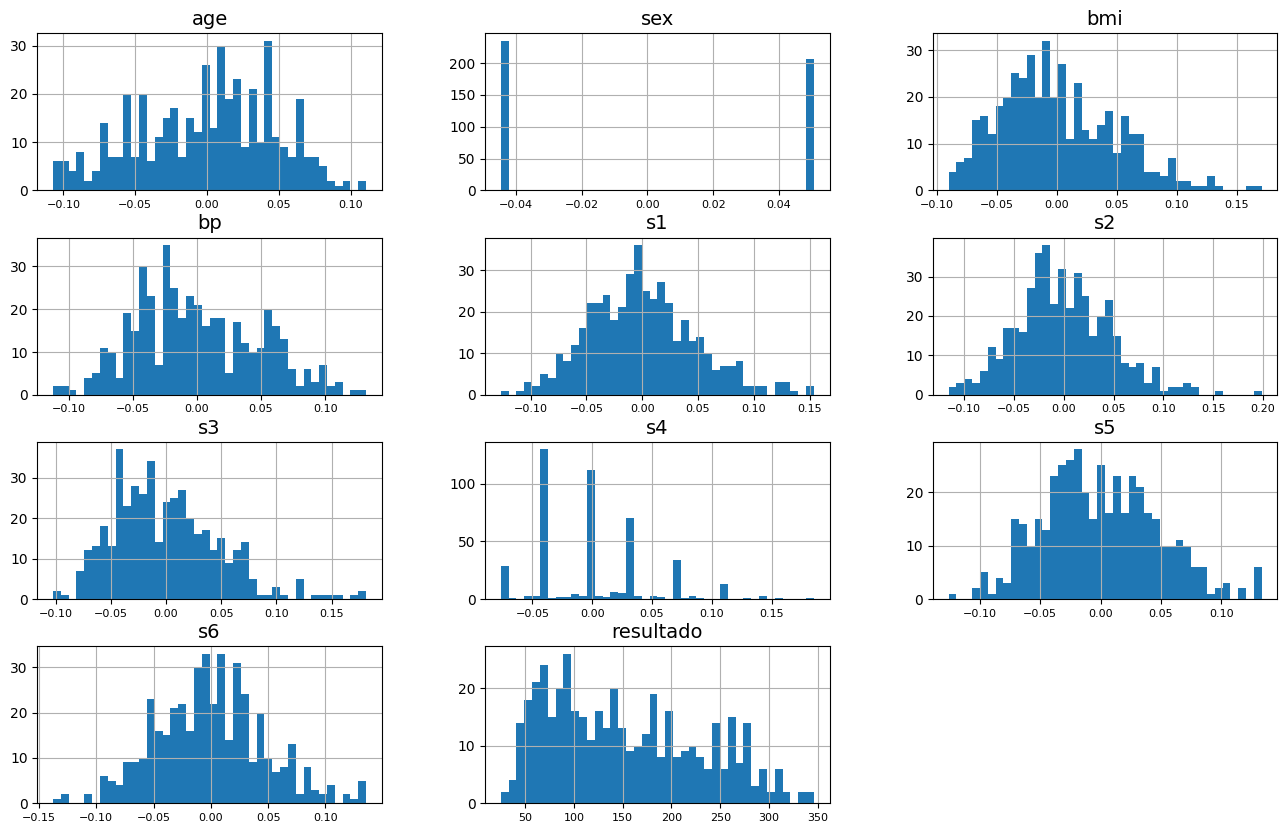

In [25]:
plt.tight_layout()
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=10)
df_diabetes.hist(bins=40, figsize=(16, 10))
plt.show()

Muestra la matriz de correlaciones

In [26]:
corr_matrix = df_diabetes.corr(numeric_only=True).abs()
target_corr=corr_matrix['resultado'].sort_values(ascending=False)
target_corr

resultado    1.000000
bmi          0.586450
s5           0.565883
bp           0.441482
s4           0.430453
s3           0.394789
s6           0.382483
s1           0.212022
age          0.187889
s2           0.174054
sex          0.043062
Name: resultado, dtype: float64

In [ ]:
# a la vista de estos resultados el sexo parece ser muy poco relevante, borraremos esa columna cuando tengamos que tranformar los datos.

In [27]:
corr_matrix.style.background_gradient()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,resultado
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,0.196455,0.659817,0.318357,0.290600,0.174054
s3,0.075181,0.379090,0.366811,0.178762,0.051519,0.196455,1.000000,0.738493,0.398577,0.273697,0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,0.273697,0.417212,0.464669,1.000000,0.382483


#### DIVIDIR LOS DATOS

In [15]:
df_diabetes_train, df_diabetes_test = train_test_split(df_diabetes, test_size=0.15, random_state=17)


#### PREPARAR LOS DATOS

In [42]:

# age	sex	bmi	bp	s1	s2	s3	s4	s5	s6	resultado
transformar = ColumnTransformer([
        ("pipeline_general", SimpleImputer(strategy='mean'), ["age", "bmi", "bp", "s1","s2","s3","s4","s5","s6"]),
        ("drop_columns", 'drop', ["sex"])
    ], 
    remainder='passthrough',
    verbose_feature_names_out=False
)

pipeline=make_pipeline(transformar)

prep_array = pipeline.fit_transform(df_diabetes)

feature_names = pipeline.get_feature_names_out()

df_diabetes_adapt = pd.DataFrame(prep_array, columns=feature_names)
df_diabetes_adapt.head()

,age,bmi,bp,s1,s2,s3,s4,s5,s6,resultado
0,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


### ENTRENAMIENTO Y EVALUACIÓN DEL MODELO

Crea y entrena el modelo con diferentes algoritmos y muestra los resultados obtenidos con validación cruzada y utilizando la métrica RMSE para medir el error

In [57]:
df_diabetes_train_y = df_diabetes_train['resultado'].copy()
df_diabetes_train_x = df_diabetes_train.drop('resultado',axis=1)

df_diabetes_test_y = df_diabetes_test['resultado'].copy()
df_diabetes_test_x = df_diabetes_test.drop('resultado',axis=1)


rango_y = y.max() - y.min()
promedio_y = y.mean()
modelo_LogR=make_pipeline(transformar,LogisticRegression(random_state=17, max_iter=1000))
modelo_LinR=make_pipeline(transformar,LinearRegression())
modelo_Ridge=make_pipeline(transformar,Ridge())
modelo_Lasso=make_pipeline(transformar,Lasso())

modelos=[modelo_LogR,modelo_LinR,modelo_Ridge,modelo_Lasso]

for modelo in modelos:
    
    
    print(modelo.steps[-1][1].__class__.__name__)
    y_predicciones = cross_val_predict(modelo, df_diabetes_train_x, df_diabetes_train_y, cv=5)
    rmse = np.sqrt(mean_squared_error(df_diabetes_train_y, y_predicciones))
    print("RSME en el conjunto de entrenamiento:",rmse)
    print("RMSE relativo al rango:", rmse / rango_y)
    print("RMSE relativo al promedio:", rmse / promedio_y)
    print("------------------")

LogisticRegression
RSME en el conjunto de entrenamiento: 72.42953357114303
RMSE relativo al rango: 0.2256371762340904
RMSE relativo al promedio: 0.4760919923032169
------------------
LinearRegression
RSME en el conjunto de entrenamiento: 55.98938151628621
RMSE relativo al rango: 0.17442174927191964
RMSE relativo al promedio: 0.36802799741532205
------------------
Ridge
RSME en el conjunto de entrenamiento: 59.70478472170645
RMSE relativo al rango: 0.18599621408631295
RMSE relativo al promedio: 0.39244999251958196
------------------
Lasso
RSME en el conjunto de entrenamiento: 61.7910016878746
RMSE relativo al rango: 0.19249533236098004
RMSE relativo al promedio: 0.4061630615237359
------------------


Calcula el máximo de y (del dataset original) y el mínimo de y (del dataset original) para ver con prespectiva si RMSE es aceptable o no.

In [58]:
print("Máximo original: {} \nMínimo original {}".format(max(y),min(y)))





Máximo original: 346.0 
Mínimo original 25.0


In [ ]:
# Un RSME relativo al rango de 0.17 es más alto de lo deseado pero no exageradamente alto, parace ser un modelo con el que si podemos trabajar.

### OPTIMIZACIÓN DEL MODELO

Vamos a suponer que el mejor modelo que has obtenido es con Ridge y vamoas a aplicar búsqueda exhaustiva para el parámetro alpha.

In [67]:
alpha_values = np.logspace(-2, 3, num=50)
grid_search = GridSearchCV(
    estimator=modelo_Ridge,
    param_grid={'ridge__alpha': alpha_values},
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(df_diabetes_train_x, df_diabetes_train_y)
print("Mejores hiperparámetros:", grid_search.best_params_)

Mejores hiperparámetros: {'ridge__alpha': 0.0655128556859551}


Evalúa este mejor modelo en el conjunto de pruebas

In [72]:
best_model = grid_search.best_estimator_

# Realizar validación cruzada y obtener los resultados de MSE
y_predicciones = best_model.predict(df_diabetes_test_x)

# Mostrar el RMSE
rmse_opti = np.sqrt(mean_squared_error(df_diabetes_test_y, y_predicciones))
print("RMSE con el modelo óptimo:",rmse_opti)

RMSE con el modelo óptimo: 55.314788453465255


### PRESENTACIÓN DEL MODELO

Guarda el modelo en un archivo

In [73]:
joblib.dump(best_model, "./solucion1/modelo_diabetes.pkl")

['./solucion1/modelo_diabetes.pkl']

Opcional: hacer un script de Python que pida los datos y te prediga el resultado

## EJERCICIO 4

Usa regresión logística para crear un modelo que deduzca el tipo de flor iris

### RECOPILACIÓN Y PREPARACIÓN DE LOS DATOS

#### OBTENER LOS DATOS

In [ ]:
iris = load_iris(as_frame=True)
X = iris.data
y = iris.target


<class 'pandas.core.series.Series'>
RangeIndex: 150 entries, 0 to 149
Series name: target
Non-Null Count  Dtype
--------------  -----
150 non-null    int32
dtypes: int32(1)
memory usage: 732.0 bytes


In [ ]:
data_iris=np.column_stack((X,y))
df_iris = pd.DataFrame(data=data_diabetes)
column_names = list(X.columns) + ['resultado']
df_iris = pd.DataFrame(data=data_iris, columns=column_names)

#### EXPLORAR LOS DATOS

Visualiza los datos

In [86]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   resultado          150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [87]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),resultado
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [88]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),resultado
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


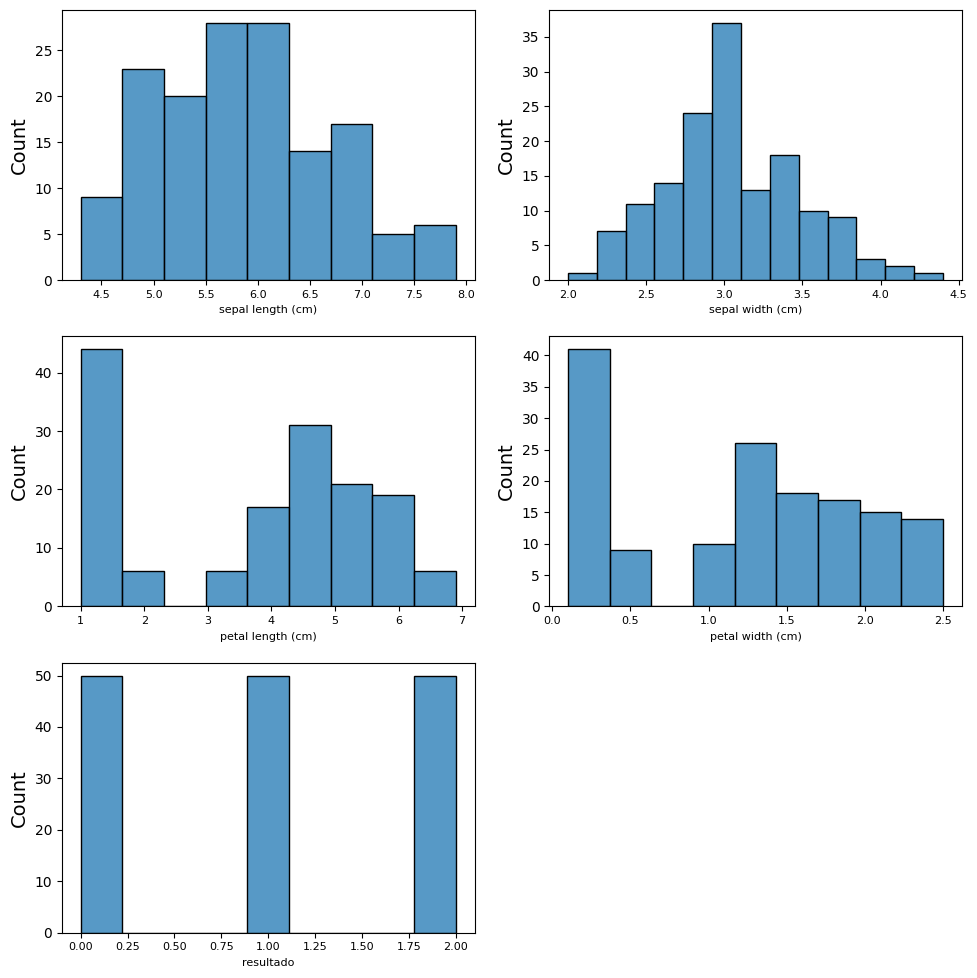

In [94]:
Xs=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','resultado']
plt.figure(figsize=(10,10))
for contador in range(5):
    plt.subplot(3,2,contador+1)
    plt.xlabel(Xs[contador],fontsize=8)
    if contador<5:
        sns.histplot(df_iris,x=Xs[contador],legend=None)
    else:
        sns.countplot(df_iris,x=Xs[contador],legend=None)


plt.tight_layout()
plt.show()


Representa la matriz de correlaciones

In [89]:
corr_matrix = df_iris.corr(numeric_only=True).abs()
target_corr=corr_matrix['resultado'].sort_values(ascending=False)
target_corr

resultado            1.000000
petal width (cm)     0.956547
petal length (cm)    0.949035
sepal length (cm)    0.782561
sepal width (cm)     0.426658
Name: resultado, dtype: float64

In [90]:
corr_matrix.style.background_gradient()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),resultado
sepal length (cm),1.000000,0.117570,0.871754,0.817941,0.782561
sepal width (cm),0.117570,1.000000,0.428440,0.366126,0.426658
petal length (cm),0.871754,0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,0.366126,0.962865,1.000000,0.956547
resultado,0.782561,0.426658,0.949035,0.956547,1.000000


#### DIVIDIR LOS DATOS

In [92]:
df_iris_train, df_iris_test = train_test_split(df_iris, test_size=0.15, random_state=17)

df_iris_train_y = df_iris_train['resultado'].copy()
df_iris_train_x = df_iris_train.drop('resultado',axis=1)

df_iris_test_y = df_iris_test['resultado'].copy()
df_iris_test_x = df_iris_test.drop('resultado',axis=1)


#### PREPARAR LOS DATOS

Solo hay que estandarizar las columnas y por lo tanto se puede hacer directamente en la pipeline que define el modelo en el siguiente punto

### SELECCIÓN Y ENTRENAMIENTO DEL MODELO

Crear y entrenar el modelo con regresión logística y validacion cruzada ¿cuál es la exactitud en el conjunto de entrenamiento?

In [106]:
modelo_LogR = make_pipeline(StandardScaler(),LogisticRegression())
modelo_LogR.fit(df_iris_train_x, df_iris_train_y)
predicciones_train_iris = cross_val_predict(modelo_LogR, df_iris_train_x, df_iris_train_y, cv=5)
exactitud_train_iris = accuracy_score(df_iris_train_y, predicciones_train_iris)
print("Exactitud del modelo con el conjunto de entrenamiento:",exactitud_train_iris)

Exactitud del modelo con el conjunto de entrenamiento: 0.9606299212598425


Calcula matriz de confusion, precision, recall y f1 en el conjunto de entrenamiento

Precisión en el conjunto de entrenamiento: 0.9602428515471995
Sensibilidad en el conjunto de entrenamiento: 0.958869395711501
F1 en el conjunto de entrenamiento: 0.9594627594627595


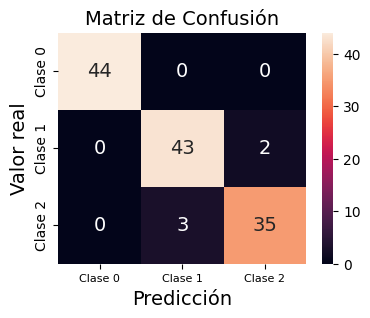

In [107]:
matrix = confusion_matrix(df_iris_train_y,predicciones_train_iris)

# Calcular la precision con la media macro dado a que tenemos datos balanceados
precission_train_iris = precision_score(df_iris_train_y, predicciones_train_iris, average='macro')

# Calcular la sensibildiad o recall
sensibilidad_train_iris = recall_score(df_iris_train_y, predicciones_train_iris, average='macro')

# Calcular el F-1
f1_train_iris = f1_score(df_iris_train_y, predicciones_train_iris, average='macro')

# Enseñar resultado

print("Precisión en el conjunto de entrenamiento:",precission_train_iris)
print("Sensibilidad en el conjunto de entrenamiento:",sensibilidad_train_iris)
print("F1 en el conjunto de entrenamiento:",f1_train_iris)


# Crear el gráfico con Seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(matrix, annot=True, fmt='d', xticklabels=['Clase 0', 'Clase 1', 'Clase 2'], yticklabels=['Clase 0', 'Clase 1', 'Clase 2'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.show()



¿Qué podemos deducir?

In [ ]:
# Hay 0 problemas con las clase 0 (¿mas bien clase 0 problemas?)
# Confundo muy rara vez la clase 1 con la dos

### OPTIMIZACIÓN DEL MODELO

Aplica búsqueda exhaustiva con los hiperparámetros de LogisticRegression (C y solver) y guarda el mejor modelo en una variable.

In [108]:
param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],            # Inverso de la fuerza de regularización
    'logisticregression__solver': ['lbfgs', 'saga', 'liblinear'],       # Algoritmos de optimización
    'logisticregression__max_iter': [5000],                             # Número máximo de iteraciones
    'logisticregression__random_state': [17]                            # Fijar la semilla para reproducibilidad
}

# Configurar la búsqueda en rejilla
grid_search = GridSearchCV(
    estimator=modelo_LogR,
    param_grid=param_grid,   # Usamos param_grid en lugar de param_distributions
    scoring="accuracy",      # Métrica de evaluación
    cv=5,                    # Validación cruzada con 5 folds
    verbose=1,               # Mostrar progreso
    n_jobs=-1,               # Usar todos los núcleos disponibles
)

# Realizar la búsqueda en rejilla en el conjunto de entrenamiento
grid_search.fit(df_iris_train_x, df_iris_train_y)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Mejores hiperparámetros: {'logisticregression__C': 10, 'logisticregression__max_iter': 5000, 'logisticregression__random_state': 17, 'logisticregression__solver': 'lbfgs'}


### EVALUACIÓN DEL MODELO

Evalua este mejor modelo en el conjunto de pruebas (exactitud, matriz de confusión, precision, recall y f1)

Exactitud del modelo con el conjunto de prueba: 0.9565217391304348
Precisión en el conjunto de prueba: 0.9444444444444445
Sensibilidad en el conjunto de prueba: 0.9552042160737813
F1 en el conjunto de prueba: 0.9552042160737813


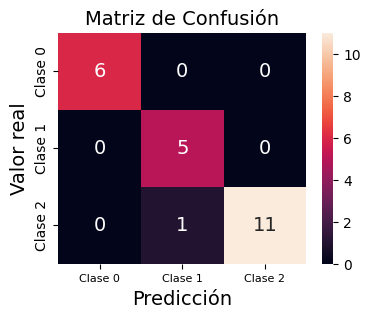

In [112]:
best_model = grid_search.best_estimator_
y_predicciones_iris_opti = best_model.predict(df_iris_test_x)


exactitud_test_iris = accuracy_score(df_iris_test_y, y_predicciones_iris_opti)
precission_test_iris = precision_score(df_iris_test_y, y_predicciones_iris_opti, average='macro')
sensibilidad_test_iris = recall_score(df_iris_test_y, y_predicciones_iris_opti, average='macro')
f1_test_iris = f1_score(df_iris_test_y, y_predicciones_iris_opti, average='macro')

matrix_test = confusion_matrix(df_iris_test_y,y_predicciones_iris_opti)

print("Exactitud del modelo con el conjunto de prueba:",exactitud_test_iris)
print("Precisión en el conjunto de prueba:",precission_test_iris)
print("Sensibilidad en el conjunto de prueba:",f1_test_iris)
print("F1 en el conjunto de prueba:",f1_train_iris)


# Crear el gráfico con Seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(matrix_test, annot=True, fmt='d', xticklabels=['Clase 0', 'Clase 1', 'Clase 2'], yticklabels=['Clase 0', 'Clase 1', 'Clase 2'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.show()


### PRESENTACIÓN DEL MODELO

Guarda el modelo en un archivo

In [113]:
joblib.dump(best_model, "./solucion2/modelo_iris.pkl")

['./solucion2/modelo_iris.pkl']

## EJERCICIO 5

Intenta predecir las emisiones de CO2 con el menor error posible (sigue todos los pasos incluido crear un script para que haga predicciones).

Prueba diferentes modelos para intentar construir el mejor modelo posible (explica todos los pasos que das hasta llegar a la solución, quiero ver también los modelos que pruebas y luego los rechazas)

Dataset: https://www.kaggle.com/datasets/midhundasl/co2-emission-of-cars-dataset

In [127]:
data_co2 = pd.read_csv("./Datos/CO2.csv")
df_co2= pd.DataFrame(data=data_co2)
df_co2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Car         36 non-null     object 
 1   Model       36 non-null     object 
 2   Volume      36 non-null     int64  
 3   Weight      36 non-null     int64  
 4   CO2         36 non-null     int64  
 5   Unnamed: 5  0 non-null      float64
dtypes: float64(1), int64(3), object(2)
memory usage: 1.8+ KB


In [128]:
df_co2=df_co2.drop('Unnamed: 5',axis=1)
df_co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Car     36 non-null     object
 1   Model   36 non-null     object
 2   Volume  36 non-null     int64 
 3   Weight  36 non-null     int64 
 4   CO2     36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB


In [129]:
df_co2.describe()

,Volume,Weight,CO2
count,36.000000,36.000000,36.000000
mean,1611.111111,1292.277778,102.027778
std,388.975047,242.123889,7.454571
min,900.000000,790.000000,90.000000
25%,1475.000000,1117.250000,97.750000
50%,1600.000000,1329.000000,99.000000
75%,2000.000000,1418.250000,105.000000
max,2500.000000,1746.000000,120.000000


In [130]:
df_co2.describe(include="object")

,Car,Model
count,36,36
unique,17,35
top,Mercedes,Fiesta
freq,5,2


In [123]:
df_co2.head(8)

,Car,Model,Volume,Weight,CO2
0,Toyota,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105
5,VW,Up!,1000,929,105
6,Skoda,Fabia,1400,1109,90
7,Mercedes,A-Class,1500,1365,92


In [125]:
corr_matrix = df_co2.corr(numeric_only=True).abs()
target_corr=corr_matrix['CO2'].sort_values(ascending=False)
target_corr

CO2       1.000000
Volume    0.592082
Weight    0.552150
Name: CO2, dtype: float64

In [131]:
corr_matrix.style.background_gradient()

,Volume,Weight,CO2
Volume,1.000000,0.753537,0.592082
Weight,0.753537,1.000000,0.552150
CO2,0.592082,0.552150,1.000000


In [132]:
df_co2["Car"].value_counts()

Car
Mercedes      5
Ford          5
Skoda         4
Audi          3
BMW           3
Opel          3
Volvo         3
VW            1
Mitsubishi    1
Hyundai       1
Suzuki        1
Honda         1
Hundai        1
Mini          1
Fiat          1
Mazda         1
Toyota        1
Name: count, dtype: int64

In [133]:
df_co2["Model"].value_counts()

Model
Fiesta        2
Aygo          1
A6            1
Insignia      1
C-Class       1
Octavia       1
S60           1
CLA           1
A4            1
V70           1
Focus         1
5             1
E-Class       1
XC70          1
B-Max         1
2             1
Zafira        1
Mondeo        1
Rapid         1
Space Star    1
3             1
1             1
Astra         1
I30           1
Civic         1
Swift         1
I20           1
A1            1
A-Class       1
Fabia         1
Up!           1
Cooper        1
500           1
Citigo        1
SLK           1
Name: count, dtype: int64

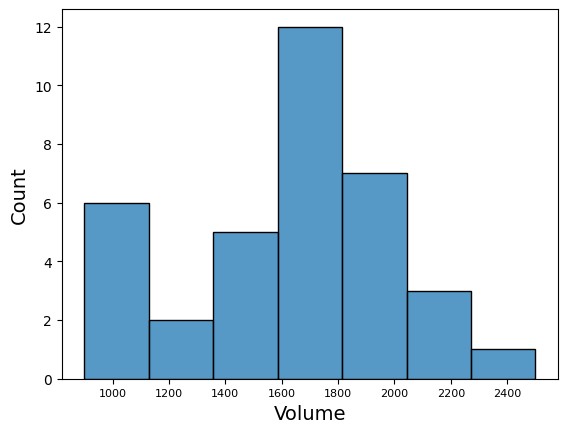

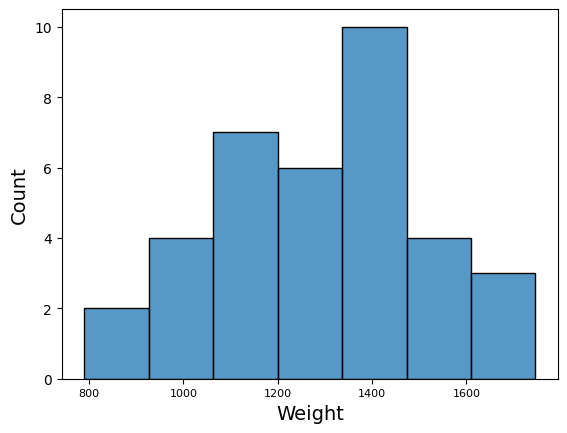

In [136]:
sns.histplot(df_co2,x="Volume",legend=None)
plt.show()
sns.histplot(df_co2,x="Weight",legend=None)
plt.show()

In [137]:
# Separamos los datos
df_co2_train, df_co2_test = train_test_split(df_co2, test_size=0.15, random_state=17)

df_co2_train_y = df_co2_train['CO2'].copy()
df_co2_train_x = df_co2_train.drop('CO2',axis=1)

df_co2_test_y = df_co2_test['CO2'].copy()
df_co2_test_x = df_co2_test.drop('CO2',axis=1)

In [139]:
preprocessing = ColumnTransformer([
    ("scaler",StandardScaler(),["Volume","Weight"]),
    ("encoder",OneHotEncoder(handle_unknown="ignore"),["Car","Model"])
])

In [161]:
# Modelos a probar
modelo_LogR=make_pipeline(preprocessing,LogisticRegression(random_state=17, max_iter=1000))
modelo_LinR=make_pipeline(preprocessing,LinearRegression())
modelo_Ridge=make_pipeline(preprocessing,Ridge())
modelo_Lasso=make_pipeline(preprocessing,Lasso())
modelo_SDG=make_pipeline(preprocessing,SGDRegressor(random_state=17))
modelo_SVR=make_pipeline(preprocessing,SVR())
modelo_RF=make_pipeline(preprocessing,RandomForestRegressor(random_state=17))

modelos=[modelo_LogR,modelo_LinR,modelo_Ridge,modelo_Lasso,modelo_SDG,modelo_SVR,modelo_RF]

for modelo in modelos:
    modelo.fit(df_co2_train_x,df_co2_train_y)
    y_predicciones = cross_val_predict(modelo, df_co2_train_x, df_co2_train_y, cv=5)

   

    print(modelo.steps[-1][1].__class__.__name__)
    rmse_train = np.sqrt(mean_squared_error(df_co2_train_y, y_predicciones)) 
    print("RMSE en el conjunto de entrenamiento:",rmse_train)
    
    

LogisticRegression
RMSE en el conjunto de entrenamiento: 5.750362307426087
LinearRegression
RMSE en el conjunto de entrenamiento: 6.692144577626143
Ridge
RMSE en el conjunto de entrenamiento: 6.427248925567717
Lasso
RMSE en el conjunto de entrenamiento: 6.246703272023338
SGDRegressor
RMSE en el conjunto de entrenamiento: 58.575012318074414
SVR
RMSE en el conjunto de entrenamiento: 7.032949793254897
RandomForestRegressor
RMSE en el conjunto de entrenamiento: 6.242429548394333


In [ ]:
# SDG está un bastante perdido
# Regrsion logistica parece ser el mejor modelo para este caso

In [160]:
# Optimizacion del modelo
param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],            # Inverso de la fuerza de regularización
    'logisticregression__solver': ['lbfgs', 'saga', 'liblinear'],       # Algoritmos de optimización
    'logisticregression__max_iter': [5000],                             # Número máximo de iteraciones
    'logisticregression__random_state': [17]                            # Fijar la semilla para reproducibilidad
}

# Configurar la búsqueda en rejilla
grid_search = GridSearchCV(
    estimator=modelo_LogR,
    param_grid=param_grid,   # Usamos param_grid en lugar de param_distributions
    scoring="accuracy",      # Métrica de evaluación
    cv=5,                    # Validación cruzada con 5 folds
    verbose=1,               # Mostrar progreso
    n_jobs=-1,               # Usar todos los núcleos disponibles
)

# Realizar la búsqueda en rejilla en el conjunto de entrenamiento
grid_search.fit(df_co2_train_x, df_co2_train_y)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Mejores hiperparámetros: {'logisticregression__C': 0.001, 'logisticregression__max_iter': 5000, 'logisticregression__random_state': 17, 'logisticregression__solver': 'lbfgs'}


In [162]:
best_model = grid_search.best_estimator_
y_predicciones_CO2_opti = best_model.predict(df_co2_test_x)

rmse_test = np.sqrt(mean_squared_error(df_co2_test_y, y_predicciones_CO2_opti)) 
print("RMSE en el conjunto de entrenamiento:",rmse_test)



RMSE en el conjunto de entrenamiento: 11.269427669584644


In [ ]:
# No es un modelo especialmente preciso, pero tambien es cierto que tampoco tenemos un volumen de datos precisamente extenso.

In [163]:
# Guardamos el modelo
joblib.dump(best_model, "./solucion_ejer5/modelo2_11CO2.pkl")

['./solucion_ejer5/modelo2_11CO2.pkl']